# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

plt.style.use('ggplot')

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_number_of_user'
time_path = 'data/time/compare_number_of_user_2020_12_3_2_52_3.npy'
cost_path = 'data/cost/compare_number_of_user_2020_12_3_2_52_3.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(8, 101, step=8)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(36,) (36,)
Wall time: 6 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(12, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      12 non-null     float64
 1   approx      12 non-null     float64
 2   approx_woc  12 non-null     float64
 3   size        12 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 464.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,0.342807,0.043177,8
1,0.000100,0.752940,0.108587,16
2,0.000000,1.156513,0.251633,24
3,0.000000,1.710733,0.403261,32
4,0.000000,1.968207,0.569571,40
5,0.000100,2.518293,1.893707,48
6,0.000000,3.446315,1.719422,56
7,0.000000,5.196990,11.109667,64
8,0.000201,4.450724,108.837893,72
9,0.000000,4.950365,5.292651,80


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(12, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      12 non-null     float64
 1   approx      12 non-null     float64
 2   approx_woc  12 non-null     float64
 3   size        12 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 464.0 bytes
None


,greedy,approx,approx_woc,size
0,5813.9,5337.1,5397.9,8
1,11287.5,9300.4,9903.5,16
2,16960.2,13097.9,13608.5,24
3,21514.0,16282.3,16730.7,32
4,28289.8,20842.9,20768.9,40
5,32199.5,23725.1,22775.2,48
6,39718.4,28204.8,27755.4,56
7,49081.3,32391.2,31362.9,64
8,50559.5,34404.1,32431.4,72
9,55317.7,37172.4,35034.1,80


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000033
approx         3.288662
approx_woc    60.166898
size          52.000000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,5813.9,5337.1,5397.9,8,1.089337,1.077067
1,11287.5,9300.4,9903.5,16,1.213657,1.139749
2,16960.2,13097.9,13608.5,24,1.294879,1.246295
3,21514.0,16282.3,16730.7,32,1.321312,1.285900
4,28289.8,20842.9,20768.9,40,1.357287,1.362123
5,32199.5,23725.1,22775.2,48,1.357191,1.413797
6,39718.4,28204.8,27755.4,56,1.408214,1.431015
7,49081.3,32391.2,31362.9,64,1.515266,1.564948
8,50559.5,34404.1,32431.4,72,1.469578,1.558968
9,55317.7,37172.4,35034.1,80,1.488139,1.578967


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.375130
approx_woc_gain    1.407258
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        36353.325000
approx        25402.208333
approx_woc    24459.616667
dtype: float64

# Plots

## Processing time

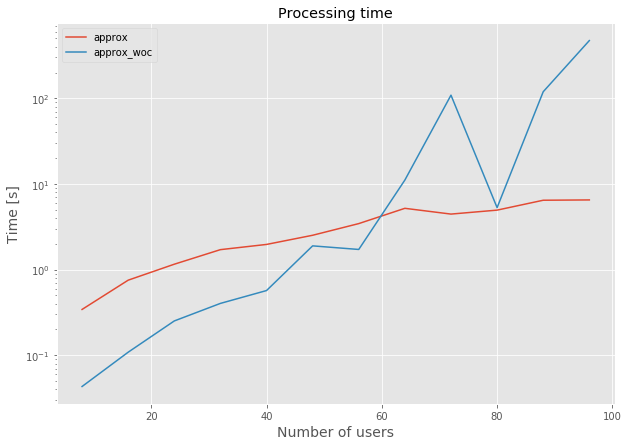

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_time['approx'], label='approx')
plt.plot(sizes, df_time['approx_woc'], label='approx_woc')
plt.yscale('log')
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Time [s]', fontsize=14)
plt.title('Processing time')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_proc_time.png'))
plt.show()

## Travel cost

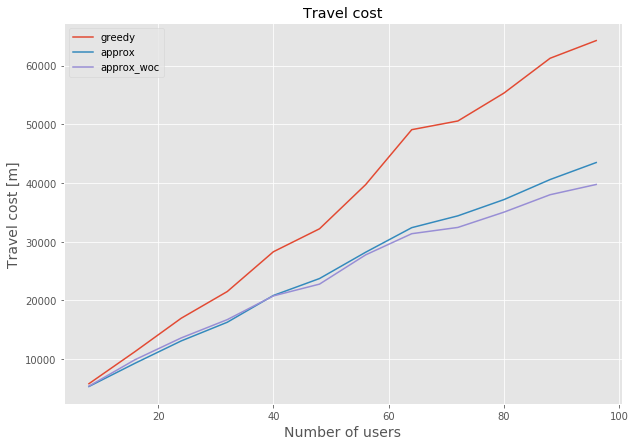

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_cost['greedy'], label='greedy')
plt.plot(sizes, df_cost['approx'], label='approx')
plt.plot(sizes, df_cost['approx_woc'], label='approx_woc')
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Travel cost [m]', fontsize=14)
plt.title('Travel cost')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_travel_cost.png'))
plt.show()

## Ride-sharing efficiency

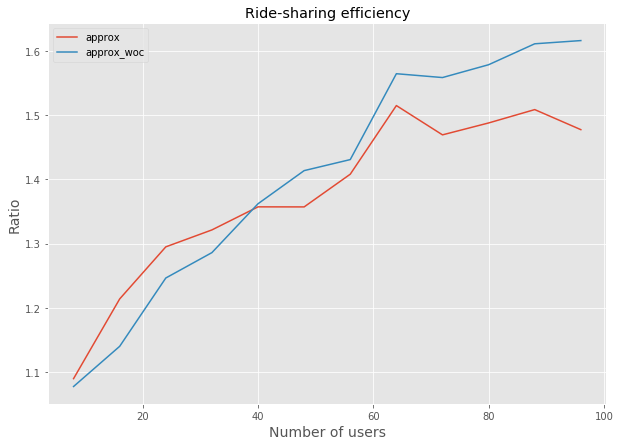

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_cost['approx_gain'], label='approx')
plt.plot(sizes, df_cost['approx_woc_gain'], label='approx_woc')
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.title('Ride-sharing efficiency')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_rs_efficiency.png'))
plt.show()